# LSTM Time Series - Stock Price Prediction
## Part 1 - Data Explanatory Analysis
This notebook focuses on examining the raw dataset containing daily historical prices of Google stocks. The goal is to identify a specific timeframe suitable for further analysis and prediction using LSTM.

> **INPUT**: The raw data file of all available stock prices of Google (Alphabet Inc.), as downloaded from its original source. <br/>
> **OUTPUT**: The extracted historical data of the targeted period for analysis, stored in an intermediary location for next steps.

### 1. INITIALIZATION

In [43]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### 2. LOAD DATASET FILE

The dataset we are going to initially load and explore is the historical records of daily price details of Google (Alphabet Inc.) sourced from [Yahoo Finance](https://finance.yahoo.com/quote/GOOG).

At first, we load the complete dataset available spanning a period from 2004-08-19 up until the time of creating this script.

The main objective of loading the entire dataset is to choose a particular time frame for analysis.

In [128]:
dirPath = '/Users/nguyenconghung/Documents/PYTHON/lstm-stock-price-prediction/'
msft_df = yf.download("2303.TW", start="2021-02-01", end="2025-05-10")[['Open', 'High', 'Low', 'Close', 'Volume']].round(2)
msft_df.to_csv(dirPath + "data/raw/2303.csv")

[*********************100%***********************]  1 of 1 completed


In [129]:
# Prepare data file location and load the dataset
# data_file_location = "..\\data\\raw\\"
# data_file_name = "google_stock_price_full"
# data_file_ext = "csv"

# Load data file
data = pd.read_csv(dirPath + 'data/raw/2303.csv')

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

close_prices = data['Close']

# 創建 DataFrame
df = pd.DataFrame(close_prices, columns=['Close'])

# 設定參數
short_window = 12  # 短期 EMA 週期
long_window = 26   # 長期 EMA 週期
signal_window = 9  # 訊號線 EMA 週期

# 計算短期和長期 EMA
df['EMA12'] = df['Close'].ewm(span=short_window, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=long_window, adjust=False).mean()

# 計算 MACD 線 (短期 EMA - 長期 EMA)
df['MACD'] = df['EMA12'] - df['EMA26']

# 計算訊號線 (MACD 的 9 週期 EMA)
df['Signal'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()

# # 計算柱狀圖 (Histogram)
# df['Histogram'] = df['MACD'] - df['Signal']

# # 輸出最後幾行數據
# print(df[['Close', 'MACD', 'Signal', 'Histogram']].tail())

# # 繪圖
# plt.figure(figsize=(14, 6))

# # 繪製 MACD 和訊號線
# plt.plot(df['MACD'], label='MACD', color='blue')
# plt.plot(df['Signal'], label='Signal', color='orange')

# # 繪製柱狀圖
# plt.bar(df.index, df['Histogram'], color='gray', alpha=0.5, label='Histogram')

# plt.title("MACD 指數平滑異同移動平均線")
# plt.legend()
# plt.show()


In [ ]:
from ta.momentum import StochRSIIndicator
stoch_rsi = StochRSIIndicator(close=data['Close'], window=14, smooth1=3, smooth2=3)
# Add Stoch RSI to the DataFrame
data['stoch_rsi_k'] = stoch_rsi.stochrsi_k()
data['stoch_rsi_d'] = stoch_rsi.stochrsi_d()
# data['MACD'] = df['MACD']
# data['Signal'] = df['Signal']
# data['Histogram'] = df['Histogram']

In [120]:
# Check data types
data = data.dropna()

In [121]:
data.to_csv(dirPath + 'data/raw/2303.csv',index=False)

### 3. INITIAL DATA CLEANING

As we notice, the Date column is currently in a String format which requires conversion to proper Datetime format.

In [122]:
# Convert Date column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Date"])

In [123]:
# Check column format
data.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                  int64
stoch_rsi_k           float64
stoch_rsi_d           float64
MACD                  float64
Signal                float64
dtype: object

### 4. EXPLORE DATASET

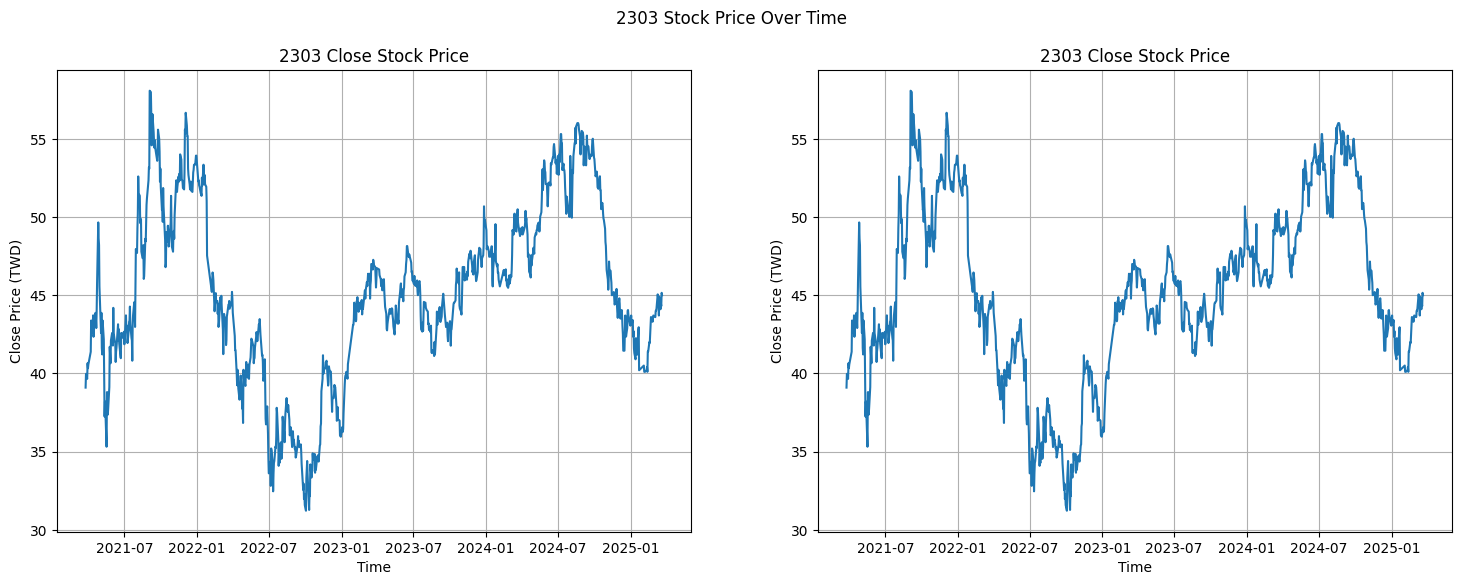

In [124]:
# Plot Open and Close price for the whole period
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(data["Date"], data["Close"])
plt.xlabel("Time")
plt.ylabel("Close Price (TWD)")
plt.title("2303 Close Stock Price")
plt.grid()

plt.subplot(1,2,2)
plt.plot(data["Date"], data["Close"])
plt.xlabel("Time")
plt.ylabel("Close Price (TWD)")
plt.title("2303 Close Stock Price")
plt.grid()

plt.suptitle("2303 Stock Price Over Time")
plt.show()

The previous charts show an inconsistent behavior in the stock's performance over time, with a completely distinct trend during the past five years.

This means that the old historical data might not be relevant to the predictions, since it's most likely to represents a different period with outdated indicators that don't affect the current trend.

Accordingly, we will concentrate our analysis on the most recent five-year data, as it is expected to provide more accurate insights for predicting future trends.

In [125]:
# Select stock price records for the last five years, starting from 2019
data_5years = data[data["Date"].dt.year >= 2019]

# Check filtered data shape
data_5years.shape

(969, 10)

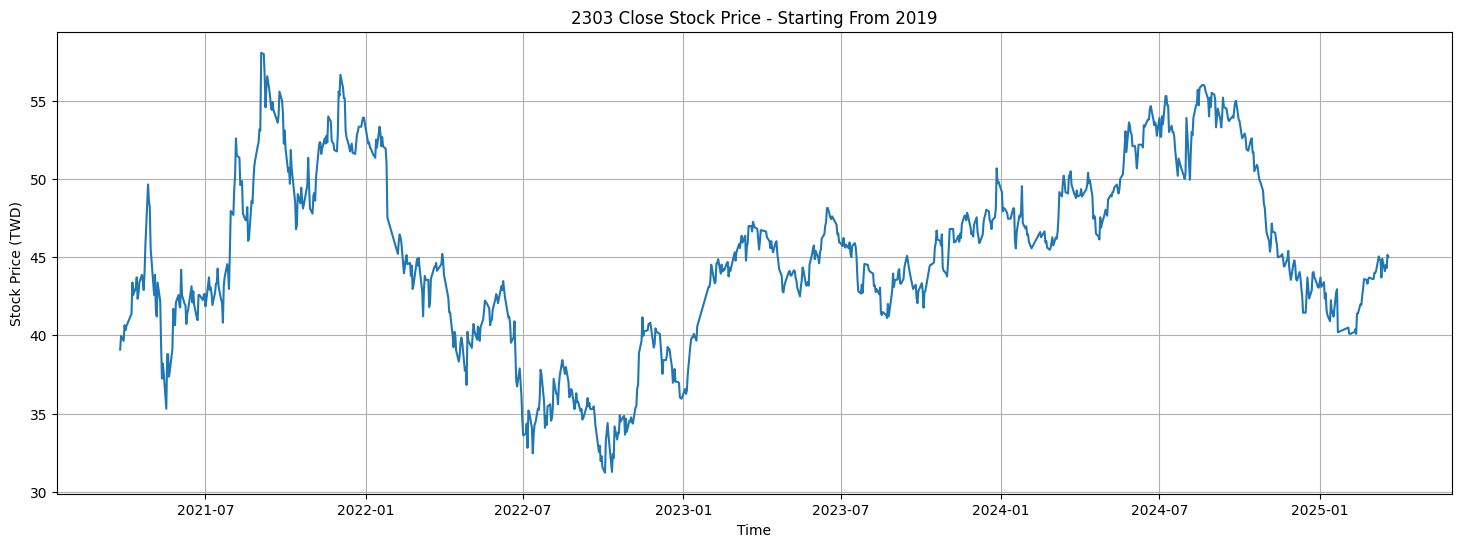

In [126]:
# Plot Open stock price performance in the last five years
plt.figure(figsize=(18,6))
plt.plot(data_5years["Date"], data_5years["Close"])
plt.xlabel("Time")
plt.ylabel("Stock Price (TWD)")
plt.title("2303 Close Stock Price - Starting From 2019")
plt.grid()

The selected period seems to be more relevant for analysis, as it's more likely to drive the stock performance with the impact of other external factors.

### 5. STORE FILTERED DATASET

In [127]:
# Prepare data file location
data_file_location = "..//data//interim//"
data_file_name = "google_stock_price_recent"
data_file_ext = "csv"

# Store dataset
data_5years.to_csv(dirPath + 'data/interim/2303_stock_price_recent.csv', index=None)